In [36]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Grand_Assign").getOrCreate()

In [37]:
df = spark.read.csv('hdfs://quickstart.cloudera:8020/user/cloudera/census.csv',header=True,inferSchema=True)

In [38]:
# Uh oh Strings! 
df.describe().printSchema()

root
 |-- summary: string (nullable = true)
 |-- SUMLEV: string (nullable = true)
 |-- REGION: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- STNAME: string (nullable = true)
 |-- CTYNAME: string (nullable = true)
 |-- CENSUS2010POP: string (nullable = true)
 |-- ESTIMATESBASE2010: string (nullable = true)
 |-- POPESTIMATE2010: string (nullable = true)
 |-- POPESTIMATE2011: string (nullable = true)
 |-- POPESTIMATE2012: string (nullable = true)
 |-- POPESTIMATE2013: string (nullable = true)
 |-- POPESTIMATE2014: string (nullable = true)
 |-- POPESTIMATE2015: string (nullable = true)
 |-- NPOPCHG_2010: string (nullable = true)
 |-- NPOPCHG_2011: string (nullable = true)
 |-- NPOPCHG_2012: string (nullable = true)
 |-- NPOPCHG_2013: string (nullable = true)
 |-- NPOPCHG_2014: string (nullable = true)
 |-- NPOPCHG_2015: string (nullable = true)
 |-- BIRTHS2010: string (nullable = true)
 |-- B

In [39]:
df.select('STNAME').distinct().show()

+--------------------+
|              STNAME|
+--------------------+
|                Utah|
|              Hawaii|
|           Minnesota|
|                Ohio|
|            Arkansas|
|              Oregon|
|               Texas|
|        North Dakota|
|        Pennsylvania|
|         Connecticut|
|            Nebraska|
|             Vermont|
|              Nevada|
|          Washington|
|            Illinois|
|            Oklahoma|
|District of Columbia|
|            Delaware|
|              Alaska|
|          New Mexico|
+--------------------+
only showing top 20 rows



In [40]:
df.select('CTYNAME').distinct().show()

+--------------------+
|             CTYNAME|
+--------------------+
|   Williamson County|
|         Owen County|
|         Rock County|
|Lewis and Clark C...|
|     Canadian County|
|       Unicoi County|
|     McLennan County|
|       Yoakum County|
|                Utah|
|      Wasatch County|
|      Webster County|
|              Hawaii|
|   Cumberland County|
|     Muskegon County|
|     Woodward County|
|    Hempstead County|
|     La Plata County|
|       DuPage County|
|      Kingman County|
|      Wexford County|
+--------------------+
only showing top 20 rows



In [45]:
df.select(['CTYNAME','CENSUS2010POP']).distinct().show()

+------------------+-------------+
|           CTYNAME|CENSUS2010POP|
+------------------+-------------+
|    Denali Borough|         1826|
|      Union County|        41639|
|      Delta County|        30952|
|   Wicomico County|        98733|
| Washington County|        25195|
|  Jefferson County|       116229|
|    Sargent County|         3829|
|     Hughes County|        14003|
|San Jacinto County|        26384|
|    Lynchburg city|        75568|
|   Franklin County|        78163|
| Santa Cruz County|        47420|
|      Boone County|        36903|
|  Riverside County|      2189641|
|    Larimer County|       299630|
|   Treutlen County|         6885|
|     Hardin County|         4320|
| Livingston County|        38950|
|Bartholomew County|        76794|
|       Lake County|       496005|
+------------------+-------------+
only showing top 20 rows



In [60]:
# Could have also used describe
from pyspark.sql.functions import max,min

In [77]:
df.select(max("CENSUS2010POP"),min("CENSUS2010POP")).show()

+------------------+------------------+
|max(CENSUS2010POP)|min(CENSUS2010POP)|
+------------------+------------------+
|          37253956|                82|
+------------------+------------------+



In [81]:
df.filter("CENSUS2010POP = 82 ").select("STNAME","CTYNAME").show()

+------+-------------+
|STNAME|      CTYNAME|
+------+-------------+
| Texas|Loving County|
+------+-------------+



In [113]:
df.filter("CENSUS2010POP = 37253956 ").select("STNAME","CTYNAME").show()

+----------+----------+
|    STNAME|   CTYNAME|
+----------+----------+
|California|California|
+----------+----------+



In [114]:
df.filter("STNAME= 'California' ").select("STNAME","CTYNAME").show()

+-------+---------------+
| STNAME|        CTYNAME|
+-------+---------------+
|Alabama|        Alabama|
|Alabama| Autauga County|
|Alabama| Baldwin County|
|Alabama| Barbour County|
|Alabama|    Bibb County|
|Alabama|  Blount County|
|Alabama| Bullock County|
|Alabama|  Butler County|
|Alabama| Calhoun County|
|Alabama|Chambers County|
|Alabama|Cherokee County|
|Alabama| Chilton County|
|Alabama| Choctaw County|
|Alabama|  Clarke County|
|Alabama|    Clay County|
|Alabama|Cleburne County|
|Alabama|  Coffee County|
|Alabama| Colbert County|
|Alabama| Conecuh County|
|Alabama|   Coosa County|
+-------+---------------+
only showing top 20 rows



In [ ]:
df.filter("STNAME= 'California' ").select("STNAME","CTYNAME").show()

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
pd_df = pd.read_csv("https://raw.githubusercontent.com/words-sdsc/coursera/master/big-data-2/csv/census.csv")
pd_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


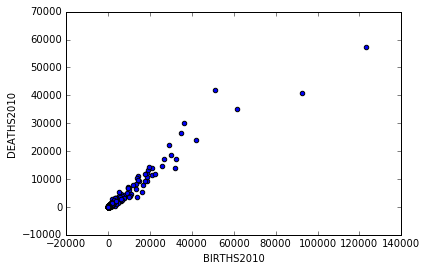

In [99]:
pd_df_sub = pd_df[['BIRTHS2010', 'DEATHS2010']]
pd_df_sub.plot.scatter(x='BIRTHS2010', y='DEATHS2010')

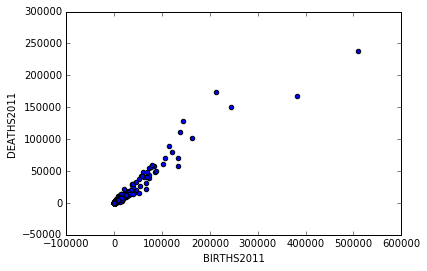

In [100]:
pd_df_sub = pd_df[['BIRTHS2011', 'DEATHS2011']]
pd_df_sub.plot.scatter(x='BIRTHS2011', y='DEATHS2011')

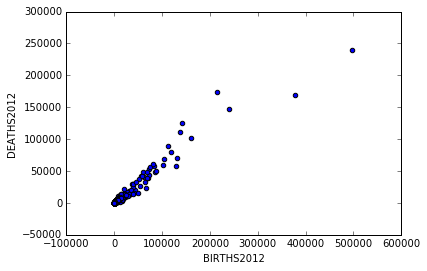

In [101]:
pd_df_sub = pd_df[['BIRTHS2012', 'DEATHS2012']]
pd_df_sub.plot.scatter(x='BIRTHS2012', y='DEATHS2012')

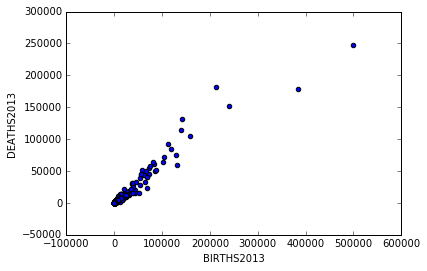

In [103]:
pd_df_sub = pd_df[['BIRTHS2013', 'DEATHS2013']]
pd_df_sub.plot.scatter(x='BIRTHS2013', y='DEATHS2013')

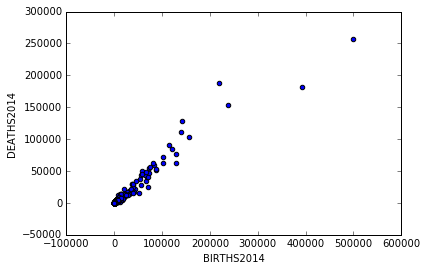

In [104]:
pd_df_sub = pd_df[['BIRTHS2014', 'DEATHS2014']]
pd_df_sub.plot.scatter(x='BIRTHS2014', y='DEATHS2014')

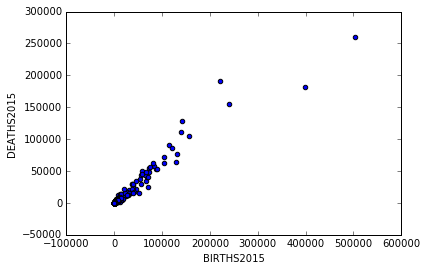

In [105]:
pd_df_sub = pd_df[['BIRTHS2015', 'DEATHS2015']]
pd_df_sub.plot.scatter(x='BIRTHS2015', y='DEATHS2015')

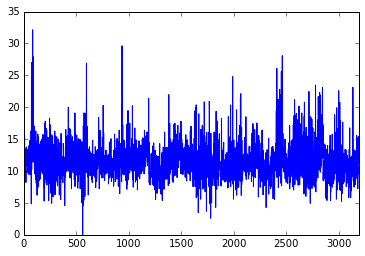

In [108]:
pd_df_sub = pd_df['RBIRTH2011']
pd_df_sub.plot.line()

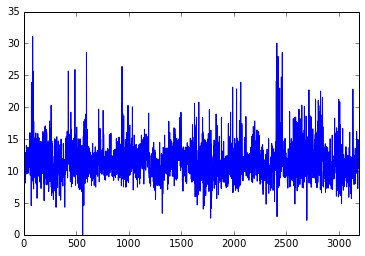

In [110]:
pd_df_sub = pd_df['RBIRTH2012']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RBIRTH2013']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RBIRTH2014']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RBIRTH2015']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RDEATH2011']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RDEATH2012']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RDEATH2013']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RDEATH2014']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RDEATH2015']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RINTERNATIONALMIG2011']
pd_df_sub.plot.line()

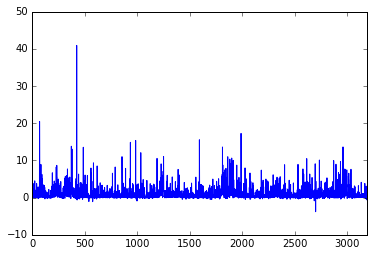

In [111]:
pd_df_sub = pd_df['RINTERNATIONALMIG2012']
pd_df_sub.plot.line()

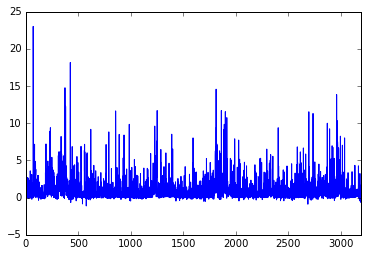

In [112]:
pd_df_sub = pd_df['RINTERNATIONALMIG2013']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RINTERNATIONALMIG2014']
pd_df_sub.plot.line()

In [ ]:
pd_df_sub = pd_df['RINTERNATIONALMIG2015']
pd_df_sub.plot.line()